In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import joblib

from feature_engineering import feature_functions

# Open data and "clean"

In [15]:
instrument = "ETH-PERPETUAL"
interval = 1
path = f"/Users/joeybesseling/Documents/Programmeren/Projects/Data/PROCESSED_{instrument}/"
features = pd.read_parquet(path + f"processed_features_{instrument}_{interval}s.parquet")
targets = pd.read_parquet(path + f"processed_targets_dir_{instrument}_{interval}s.parquet")["targets"]
features.columns = range(features.shape[1])
print(features.shape[0])

3127085


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

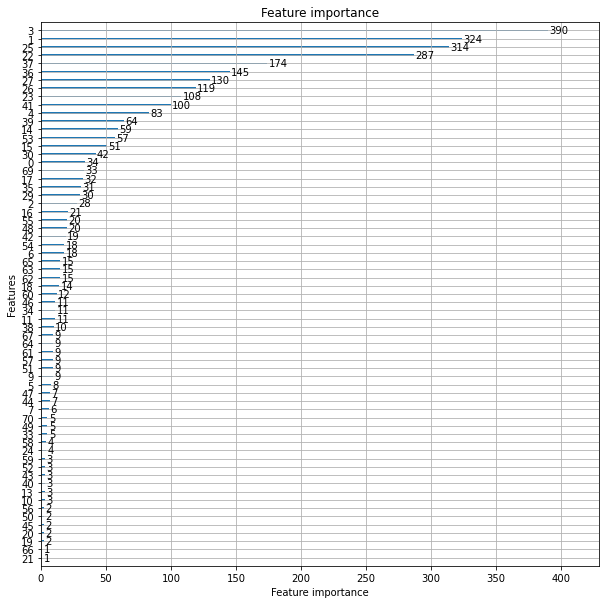

[[1.         0.14787263]
 [0.14787263 1.        ]]
train
[[1.         0.19832608]
 [0.19832608 1.        ]]
test
[[1.         0.14787263]
 [0.14787263 1.        ]]


In [21]:
class ModelResearch():
    def __init__(self,features, targets, random_state = 10):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(features, targets, train_size=.95, shuffle=False)# random_state = random_state)

    def fit_model(self, plot = False, learning_rate = .01, num_iterations = 100, bagging_fraction = 1):
        hyperparams = {
            "boosting_type": "gbdt",
            "learning_rate": learning_rate,
            "num_iterations": num_iterations,
            # "max_depth": 4,
            "min_data_per_group": 50, 
            "bagging_fraction": bagging_fraction,
            # "drop_rate": .2,
        }
        self.model = lgb.LGBMRegressor(**hyperparams)
        self.model.fit(self.X_train, self.y_train)

        if plot:
            fig, axs = plt.subplots(1,1, figsize=(10,10))
            lgb.plot_importance(self.model, ax = axs)
            plt.show()

    def predict(self, train = False):
        if train:
            pred = self.model.predict(self.X_train)
            true = self.y_train
            print(np.corrcoef(true, pred))
            return self.X_train, pred, true
        else:
            pred = self.model.predict(self.X_test)
            true = self.y_test
            print(np.corrcoef(true, pred))
            return self.X_test, pred, true

    def save_model(self, name = "model"):
        joblib.dump(self.model, name + ".joblib")


mod = ModelResearch(features, targets, random_state=3)
mod.fit_model(plot = True, bagging_fraction=.99, learning_rate=.01, num_iterations=100)
mod.save_model(name = f"models/{instrument}_model_{interval}s_regr")
f_test, t_pred, t_test = mod.predict(train = False)
print("train")
f_test, t_pred, t_test = mod.predict(train = True)
print("test")
f_test, t_pred, t_test = mod.predict(train = False)

# for learning_rate in [0.05]:
#     for num_iterations in [5, 10, 20]:
#         print(f"lr: {learning_rate}| num_iter: {num_iterations}")
#         mod.fit_model(plot = False, bagging_fraction=.9, learning_rate=learning_rate, num_iterations=num_iterations)
#         # mod.save_model(name = f"models/{instrument}_model_{interval}s_regr")
#         print("train")
#         f_test, t_pred, t_test = mod.predict(train = True)
#         print("test")
#         f_test, t_pred, t_test = mod.predict(train = False)

In [20]:
print("train")
f_test, t_pred, t_test = mod.predict(train = True)
print("test")
f_test, t_pred, t_test = mod.predict(train = False)

train


AttributeError: 'NoneType' object has no attribute 'predict'

In [5]:
features

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-29 21:15:52,1722.45,6.0,1722.75,4300.0,1722.25,2.0,1722.80,222.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-29 21:15:53,1722.25,4304.0,1722.45,7600.0,1722.10,4.0,1722.55,13140.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-29 21:15:54,1722.10,10.0,1722.35,4300.0,1722.00,7.0,1722.40,6002.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-29 21:15:55,1721.55,4301.0,1721.95,2.0,1721.50,1218.0,1722.10,4.0,4318.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-29 21:15:56,1721.55,4302.0,1721.95,2.0,1721.25,4300.0,1722.10,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29 11:59:56,1447.40,8449.0,1447.45,378.0,1447.35,4500.0,1447.50,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.3
2022-08-29 11:59:57,1447.40,29949.0,1447.45,378.0,1447.35,4500.0,1447.50,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.3
2022-08-29 11:59:58,1447.40,29949.0,1447.45,378.0,1447.35,2000.0,1447.50,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


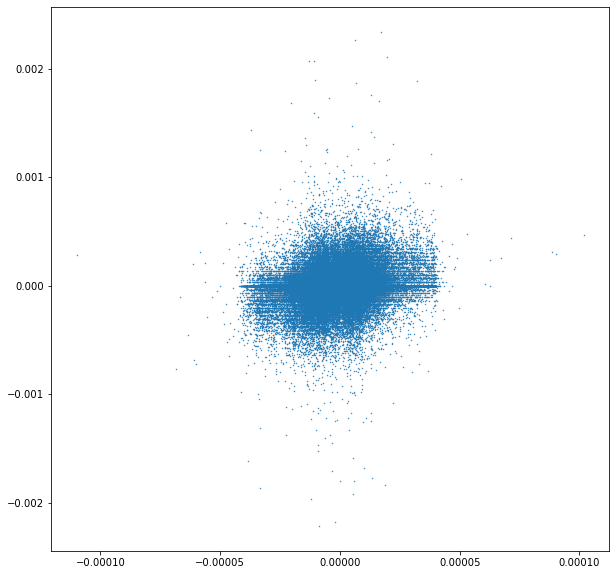

array([[19870,  3392, 13370],
       [42594,  6086, 34823],
       [14953,  3437, 17830]])

In [23]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(t_pred, t_test, s = .2)
# ax.set_xlim(-0.0005, 0.0005)
# ax.set_ylim(-0.0005, 0.0005)
plt.show()
def to_dummy(series, treshold = 1.7e-6):
    new_series = series
    new_series[series > treshold] = 1
    new_series[series < -treshold] = -1
    new_series[(series > -treshold) & (series < treshold)] = 0
    return new_series

t_pred_new = to_dummy(t_pred.copy())
t_test_new = to_dummy(t_test.copy())
confusion_matrix(t_test_new,t_pred_new)

# confusion_matrix(t_test.iloc[abs(t_pred) > .0001], t_pred[abs(t_pred) > .0001])

In [9]:
np.abs(t_pred).mean()

7.133572553382101e-06

In [9]:
t_pred, t_test

t_test[t_pred > 0.0001].mean()

nan

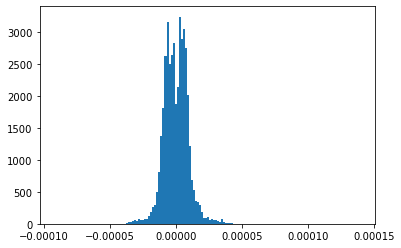

In [11]:
plt.hist(t_pred, bins = 150)
# plt.xlim(-0.00025, 0.00025)
plt.show()

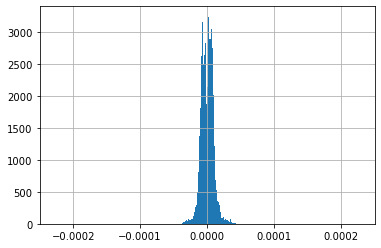

In [12]:
plt.hist(t_pred, bins = 150)
plt.xlim(-0.00025, 0.00025)
plt.grid()
plt.show()

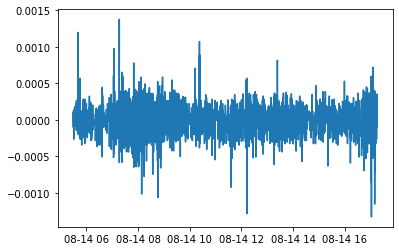

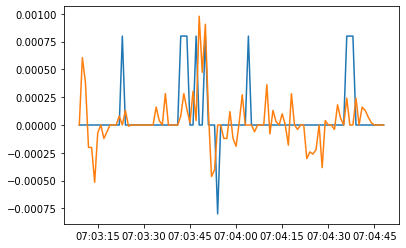

In [50]:
s = 5600
n = 5700
t_pred_2 = t_pred.copy()
t_pred_2[abs(t_pred_2) <= .000025] = 0
t_pred_2[abs(t_pred_2) > .000025] = np.sign(t_pred_2[abs(t_pred_2) > .000025])*.0008
plt.plot(t_test.iloc[s:n].index, t_pred_2[s:n])
plt.plot(t_test.iloc[s:n])
# plt.ylim(-0.00005, 0.00005)
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


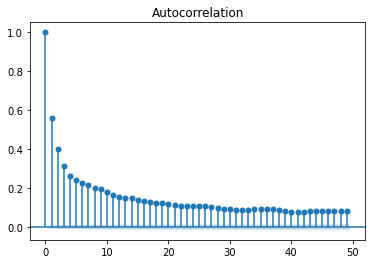

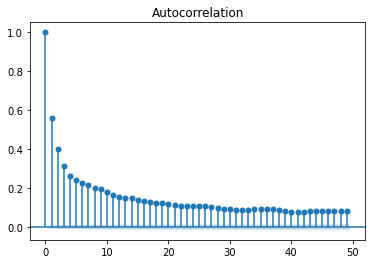

In [38]:
plot_acf(t_pred)

In [45]:
t_test

timestamp
2022-08-09 03:58:50    0.000000
2022-08-09 03:58:51    0.000000
2022-08-09 03:58:52    0.000000
2022-08-09 03:58:53    0.000000
2022-08-09 03:58:54    0.000000
                         ...   
2022-08-10 00:03:31    0.000000
2022-08-10 00:03:32    0.000000
2022-08-10 00:03:33   -0.000477
2022-08-10 00:03:34    0.000173
2022-08-10 00:03:35   -0.000043
Name: targets, Length: 71074, dtype: float64